# Lab 1: Coin Toss

"The lab is very simple.

The data file contains recordings of 60 'people' pretending to toss a coin 200 times each. Some of them are real people trying to be random, some are actually a random number generator. Write a program to automatically distinguish between the real people and the computer. You may use visual representations if you like, or can carry out the task purely analytically.

Let's see who can spot the most real people."



In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from pandas.plotting import parallel_coordinates

data = open("data.txt", "r").read().splitlines()

## Calculating statistics
Using the [Wald–Wolfowitz runs test](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test).
$$\mu = \frac{2mn}{m+n} + 1, \quad \sigma^2 = \frac{(\mu - 1)(\mu -2)}{m + n - 1}$$

In [25]:
num_attempts = []
num_zeros = []
num_ones = []
expected_num_runs = []
variance_num_runs = []
num_runs = []
error = [] # How far off from the expected value, in terms of normalized normal dist

i = 0
for sequence in data:
    num_attempts.append(len(sequence))
    num_zeros.append(sequence.count('0'))
    num_ones.append(sequence.count('1'))

    # Find the expected number of runs and the variance, given the 
    # distribution, according to the Wald--Wolfowitz runs test
    expected_num_runs.append(2 * num_zeros[i] * num_ones[i] / num_attempts[i] + 1)
    variance_num_runs.append((expected_num_runs[i] - 1) * \
        (expected_num_runs[i] - 2) / (num_attempts[i] - 1))

    # Find the actual number of runs
    runs_counter = 1
    last_symbol = sequence[0]
    for symbol in sequence[1:]:
        if not symbol == last_symbol:
            runs_counter += 1
            last_symbol = symbol
    num_runs.append(runs_counter)

    # TODO Maybe count number of occurences of run lengths?

    error.append((num_runs[i] - expected_num_runs[i]) / math.sqrt(variance_num_runs[i]))

    i += 1

plt.show()

## Plotting some statistics
Mostly nonsense atm

In [26]:
# Creating a data frame with the calculated data
df = pd.DataFrame({
    'Number of runs': num_runs,
    'Number of ones': num_ones,
    'Number of zeros': num_zeros,
    'Runs error': error,
    'One-based Index': range(1,i+1)
})

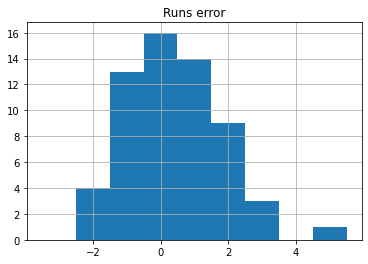

In [27]:
# df.hist();
# df.plot.scatter('Number of ones', 'Error thing');
df.hist('Runs error', bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]);

## Picking out sequences that are probably humans

In [28]:
df[abs(df['Runs error']) > 1.75]

,Number of runs,Number of ones,Number of zeros,Runs error,One-based Index
7,117,102,98,2.275034,8
8,122,109,91,3.117559,9
11,118,92,108,2.517156,12
14,115,105,95,2.025426,15
16,113,92,108,1.803676,17
22,113,107,93,1.779572,23
31,83,88,112,-2.382323,32
42,115,110,90,2.148262,43
43,117,108,92,2.374460,44
46,116,105,95,2.167561,47
